<a href="https://colab.research.google.com/github/Hitsaa/Hitendra-Singh-Shekhawat/blob/master/convolution_writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

#model that we used earlier without convolutions and max pooling

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
Implementing convolutional layers

In [3]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist #writing recognition dataset

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (28,28,1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

model.fit(x_train,y_train, epochs = 10)

test_loss = model.evaluate(x_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [5]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


Visualizing the convolutions

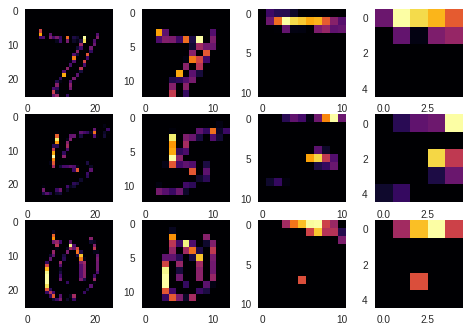

In [10]:
import matplotlib.pyplot as plt
f,axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , : , CONVOLUTION_NUMBER],cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , : ,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : ,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[2,x].grid(False)
  